In [6]:
import pandas as pd
import numpy as np
from itertools import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import re
import string
import unidecode
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import text 
import re

In [7]:
def add_newline(text):
    def Sentences(text):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(text)
        return sentenceList
    
    content = Sentences(text)[:2]
    new = "<br>".join(content)
    new = re.sub('<br> ', '<br>', new)
    
    return new

In [15]:
import plotly.tools as tls
tls.set_credentials_file(username="pfan",
                             api_key="nvzyukyl5g")
credentials = tls.get_credentials_file()

import plotly.plotly as py
from plotly.graph_objs import *

In [2]:
# topics_keyterms = pd.read_csv('topics_keyterms.csv')
# topics = topics_keyterms.transpose()
# topics.columns = topics.ix[0]
# topics = topics.ix[1:]

In [10]:
hilary_topics = pd.read_csv('data/hilary_topics.csv')
hilary_topics.head()

,Unnamed: 0,Pos_num,hilary_pos_keys,hilary_pos_ex,Neg_num,hilary_neg_keys,hilary_neg_ex
0,0,172,sanders bernie support media clinton,It would be nice to read an article about Bern...,100,biden joe run president obama,A Joe Biden run would effectively be a third O...
1,1,214,times coverage story nyt news,"Thank you, Sullivan for your comments. On the...",138,classified server email information state,While there is no doubt of the Times ongoing b...
2,2,183,president america rodham united woman,Hillary Rodham Clinton is the MOST QUALIFIED P...,159,times story news coverage clinton,"I'm a lukewarm fan of Clinton, certainly not a..."
3,3,216,biden joe run president better,Nothing -- well almost nothing -- could make m...,191,sanders bernie democrat support like,This Democrat thinks Bernie Sanders supporters...
4,4,186,win election nomination general democratic,"Hilary may win the nomination, but NOT with th...",58,black lives matter blacks laws,"Until Charles M. Blow and the ""Black Lives Mat..."


In [11]:
hilary_topics.drop('Unnamed: 0', axis =1, inplace=True)
hilary_topics['pos_percent'] = hilary_topics['Pos_num']/hilary_topics['Pos_num'].sum()
hilary_topics['pos_percent']
hilary_topics['neg_percent'] = hilary_topics['Neg_num']/hilary_topics['Neg_num'].sum()
hilary_topics['neg_percent']

hilary_topics['hilary_pos_ex1'] = hilary_topics['hilary_pos_ex'].apply(lambda x: add_newline(x))
hilary_topics['hilary_neg_ex1'] = hilary_topics['hilary_neg_ex'].apply(lambda x: add_newline(x))
hilary_topics.to_csv('data/hilary_topics1.csv')

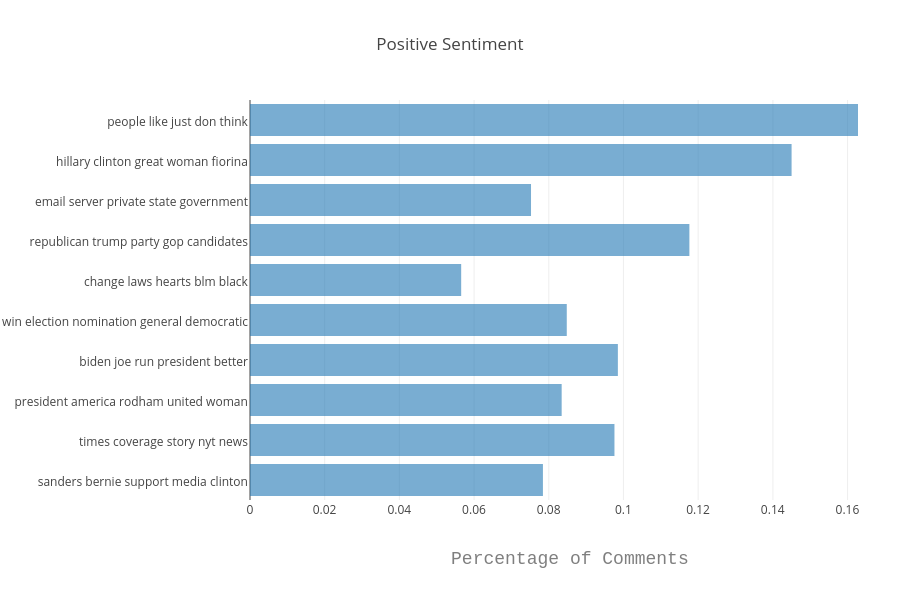

In [16]:
data = Data([
    Bar(
        y=hilary_topics['hilary_pos_keys'],
        x=hilary_topics['pos_percent'],
        text=hilary_topics['hilary_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        r=10,      #   right,  
        l=250#   left
    ),
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_pos')

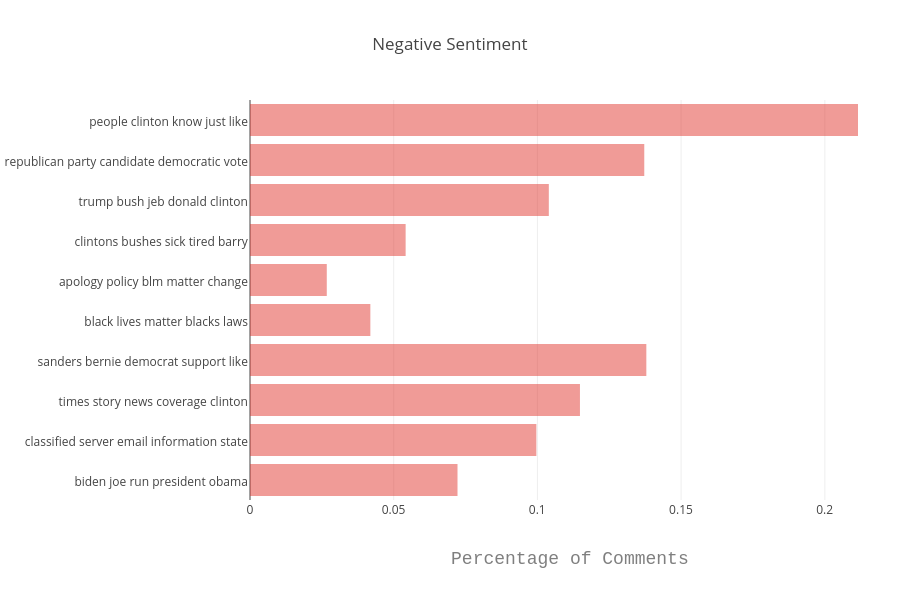

In [18]:
data = Data([
    Bar(
        y=hilary_topics['hilary_neg_keys'],
        x=hilary_topics['neg_percent'],
        text=hilary_topics['hilary_neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='hilary_neg')

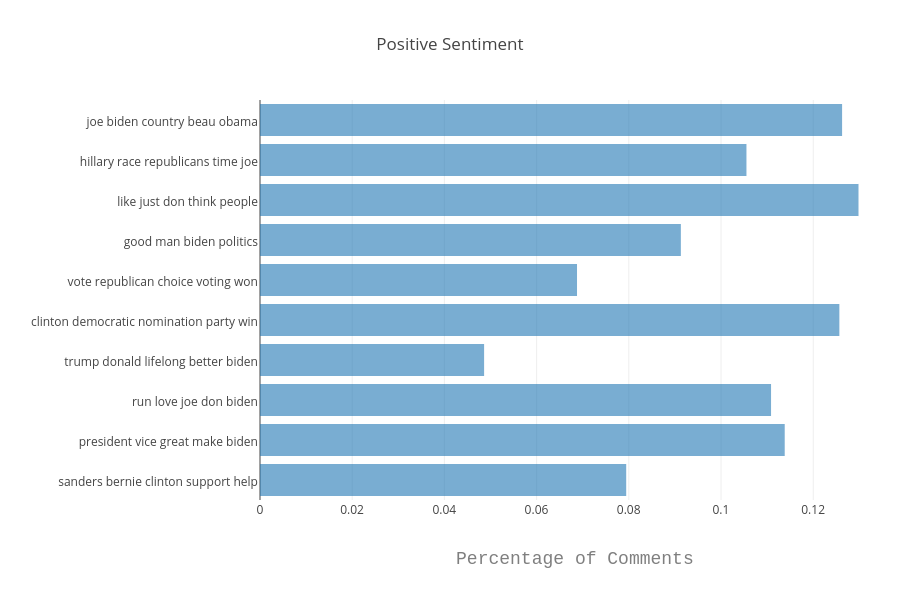

In [42]:
data = Data([
    Bar(
        y=data['biden_pos_keys'],
        x=data['pos_percent'],
        text=data['biden_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='biden_pos')

In [45]:
data = pd.read_csv('data/biden_topics.csv')

In [46]:
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['Pos_num']/data['Pos_num'].sum()
data['pos_percent']
data['neg_percent'] = data['Neg_num']/data['Neg_num'].sum()
data['neg_percent']

data['biden_pos_ex1'] = data['biden_pos_ex'].apply(lambda x: add_newline(x))
data['biden_neg_ex1'] = data['biden_neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

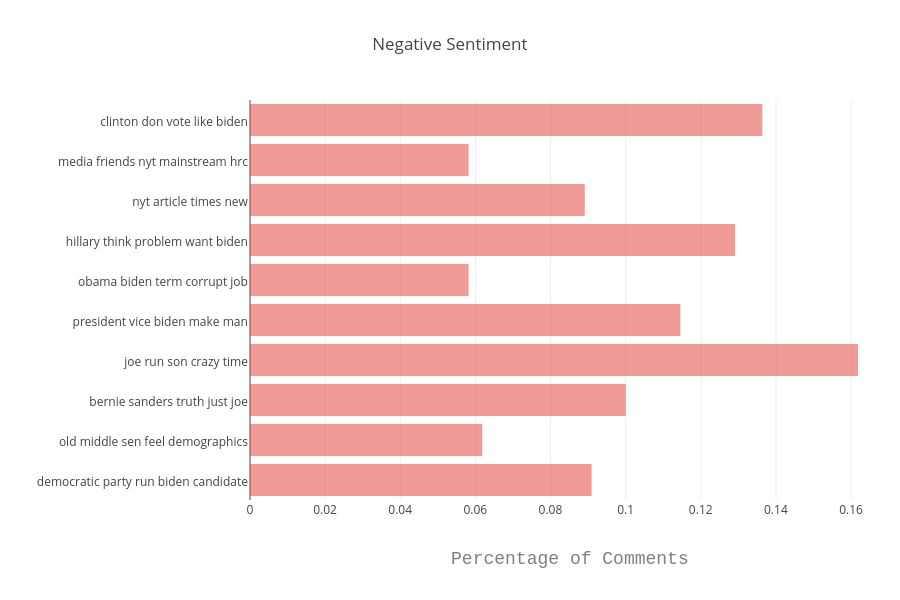

In [48]:
data = Data([
    Bar(
        y=data['biden_neg_keys'],
        x=data['neg_percent'],
        text=data['biden_neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='biden_neg')

In [61]:
data = pd.read_csv('data/trump_topics.csv')
data.columns

Index([u'Unnamed: 0', u'pos_num', u'pos_keys', u'pos_ex', u'neg_num',
       u'neg_keys', u'neg_ex'],
      dtype='object')

In [62]:
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['pos_num']/data['pos_num'].sum()
data['pos_percent']
data['neg_percent'] = data['neg_num']/data['neg_num'].sum()
data['neg_percent']

data['pos_ex1'] = data['pos_ex'].apply(lambda x: add_newline(x))
data['neg_ex1'] = data['neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

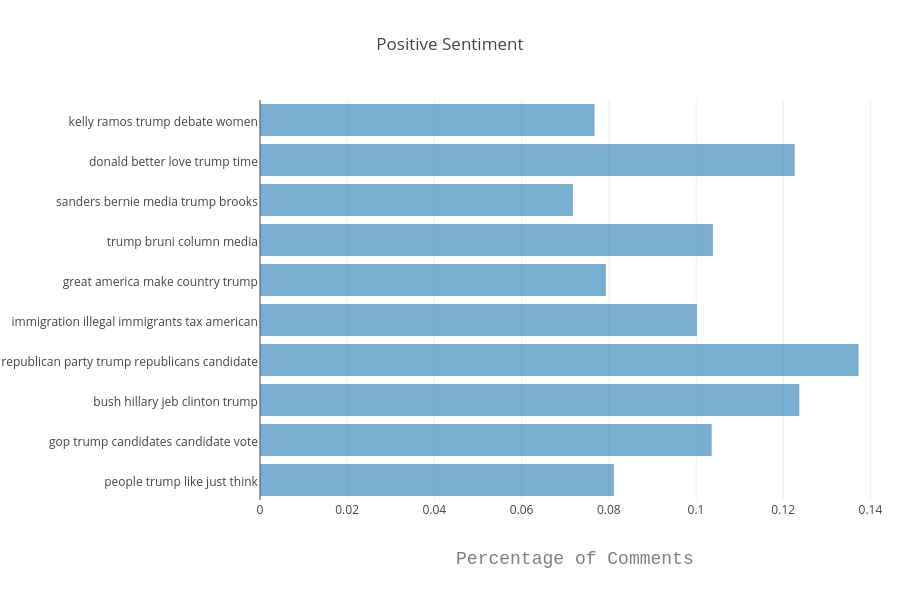

In [52]:
data = Data([
    Bar(
        y=data['trump_pos_keys'],
        x=data['pos_percent'],
        text=data['trump_pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='trump_pos')

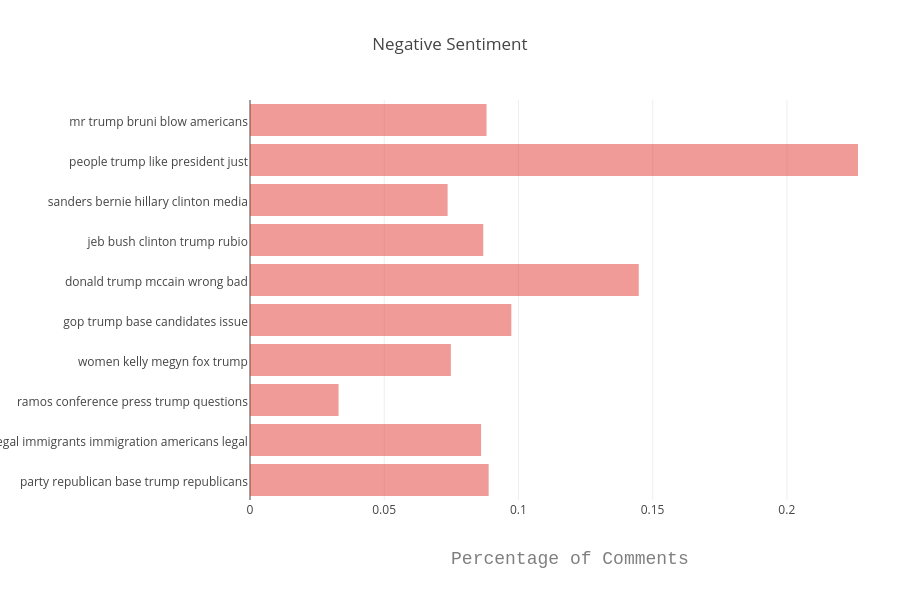

In [63]:
data = Data([
    Bar(
        y=data['neg_keys'],
        x=data['neg_percent'],
        text=data['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='trump_neg')

In [65]:
data = pd.read_csv('data/bush_topics.csv')
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['pos_num']/data['pos_num'].sum()
data['pos_percent']
data['neg_percent'] = data['neg_num']/data['neg_num'].sum()
data['neg_percent']

data['pos_ex1'] = data['pos_ex'].apply(lambda x: add_newline(x))
data['neg_ex1'] = data['neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

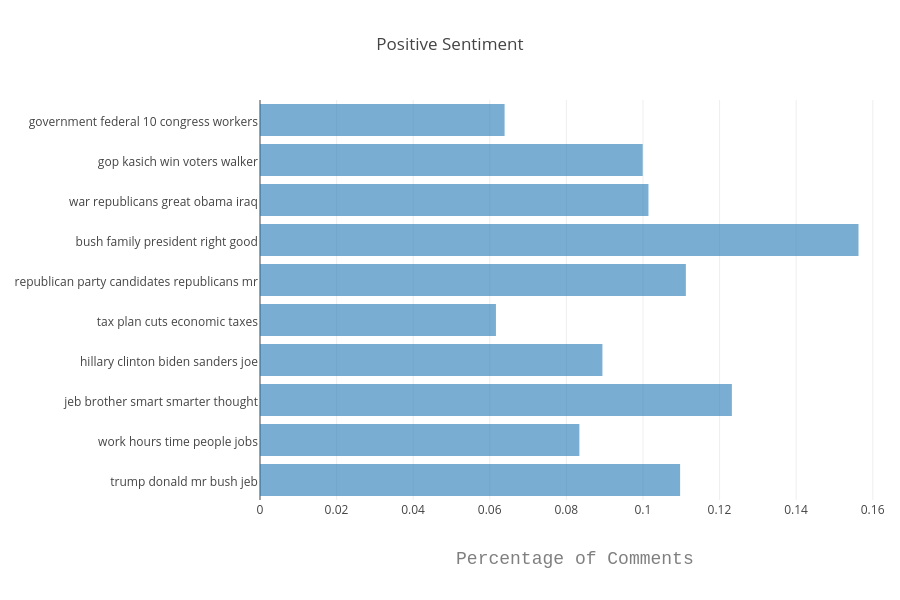

In [56]:
data = Data([
    Bar(
        y=data['pos_keys'],
        x=data['pos_percent'],
        text=data['pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='bush_pos')

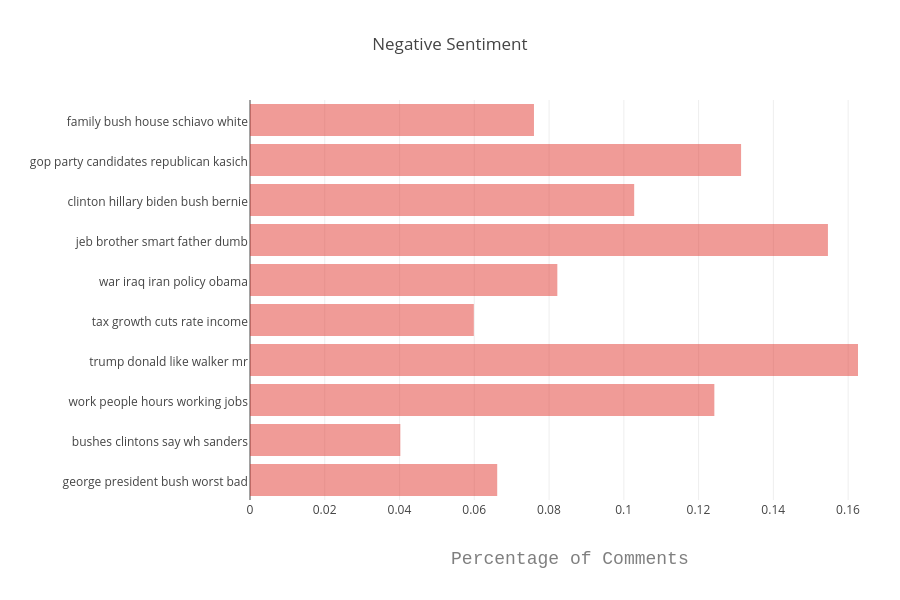

In [67]:
data = Data([
    Bar(
        y=data['neg_keys'],
        x=data['neg_percent'],
        text=data['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='bush_neg')

In [8]:
data = pd.read_csv('data/carson_topics.csv')
data.drop('Unnamed: 0', axis =1, inplace=True)
data['pos_percent'] = data['pos_num']/data['pos_num'].sum()
data['neg_percent'] = data['neg_num']/data['neg_num'].sum()

In [9]:
def clean_text(text):
    text= text.replace('mrs. ','')
    text= text.replace('mr. ','')
    text= text.replace('ms. ','')
    text= text.replace('dr. ','')
    text= text.replace('Dr.','')
    text= text.replace('Sen. ','')
    text= text.replace('Mrs. ','')
    return text


In [10]:
data['pos_ex'] = data['pos_ex'].apply(lambda x : clean_text(x))
data['neg_ex'] = data['neg_ex'].apply(lambda x : clean_text(x))


In [11]:
data['pos_ex1'] = data['pos_ex'].apply(lambda x: add_newline(x))
data['neg_ex1'] = data['neg_ex'].apply(lambda x: add_newline(x))
#biden_topics.to_csv('data/biden_topics1.csv')

In [16]:
data.head()

,pos_num,pos_keys,pos_ex,neg_num,neg_keys,neg_ex,pos_percent,neg_percent,pos_ex1,neg_ex1
0,77,bush cruz rubio paul trump,"Your view of who ""won"" the debate largely depe...",54,dr carson poor government just,Carson is a fine doctor; one of the best. Th...,0.101316,0.111111,"Your view of who ""won"" the debate largely depe...",Carson is a fine doctor; one of the best<br> ...
1,107,president obama dr carson experience,Oh my goodness! I am listening to Rush going o...,46,sanders bernie trump brooks senator,"""These four anti-party men have little experie...",0.140789,0.094650,Oh my goodness<br>I am listening to Rush going...,"""These four anti-party men have little experie..."
2,64,tax 10 people pay 000,"Hmmmmm...you make $20,000, have a kid and live...",65,black party white republican gop,Carson has a Obama proem with the GOP base: h...,0.084211,0.133745,Hmmmmm<br>,Carson has a Obama proem with the GOP base: h...
3,31,climb flaming said liberal success,Quote: Carson said he was a “flaming liberal...,19,students high junior far right,Thank you New York Times for your insightful c...,0.040789,0.039095,Quote: Carson said he was a “flaming liberal...,Thank you New York Times for your insightful c...
4,76,science evolution scientist gay carson,Happy to see you back Gail!My only comment to ...,9,kasich vis biggest huckabee times,Biggest winner: John Kasich. Kasich could esse...,0.100000,0.018519,Happy to see you back Gail<br>My only comment ...,Biggest winner: John Kasich<br>Kasich could es...


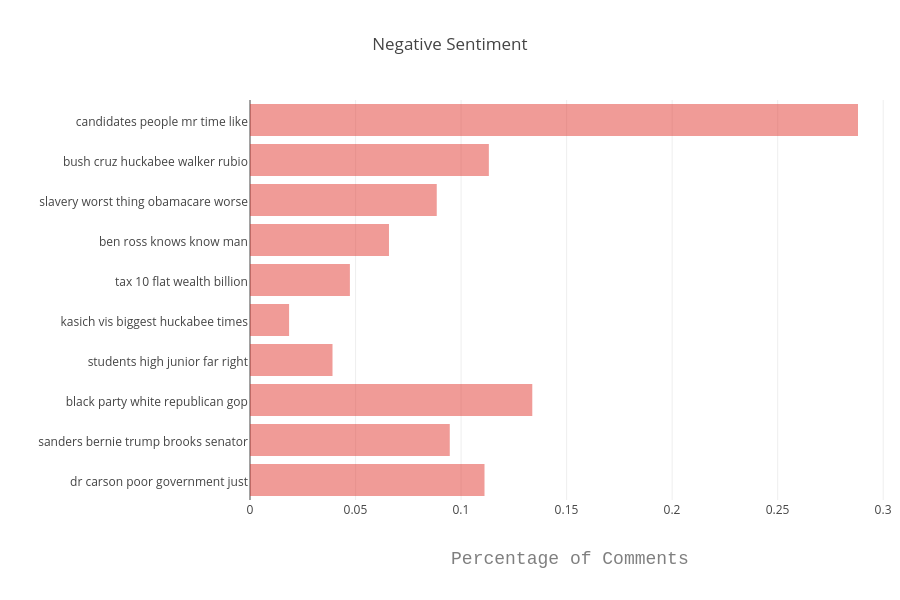

In [17]:
data = Data([
    Bar(
        y=data['neg_keys'],
        x=data['neg_percent'],
        text=data['neg_ex1'],
        orientation = 'h',
        marker=Marker(
            color='rgba(222,45,38,0.8)',
            opacity=0.6,       
        ),
        opacity=0.6, 
    )

    
])
layout = Layout(
    title='Negative Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=250,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='carson_neg')

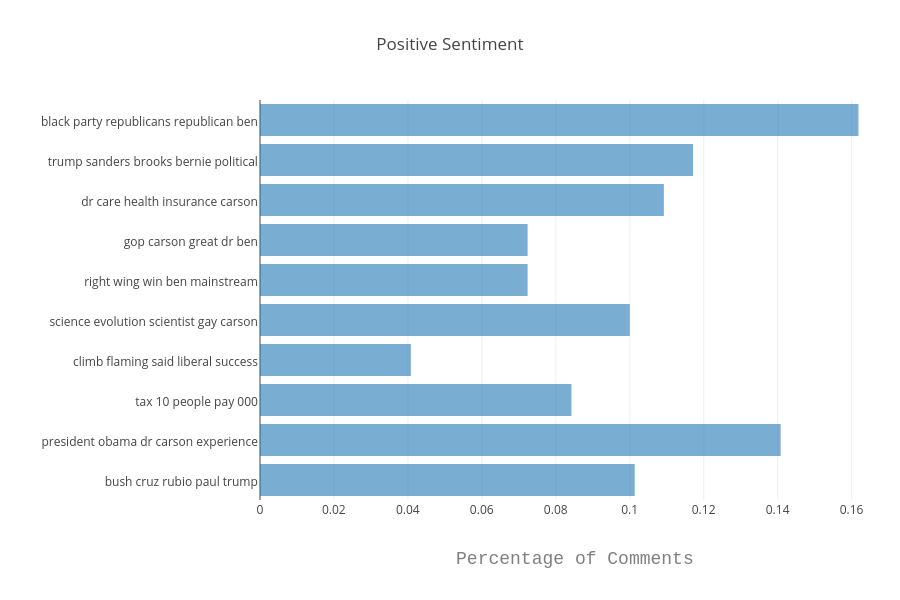

In [142]:
data1 = Data([
    Bar(
        y=data['pos_keys'],
        x=data['pos_percent'],
        text=data['pos_ex1'],
        orientation = 'h',
        opacity=0.6,     
    )

    
])
layout = Layout(
    title='Positive Sentiment',
    xaxis=XAxis(
        title='Percentage of Comments',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    width=900,
    height=600,
    margin=Margin( # set frame to plotting area margins
        t=100,     #   top,
        b=100,     #   bottom,
        l=260,      #   left,
        r=10       #   right
    ),
    
    yaxis=YAxis(
        title='',
        titlefont=Font(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, validate=False, filename='carson_pos')